# INFO-F-422 - Statistical Foundations of Machine Learning

**Teaching assistants:**  
Gian Marco Paldino - gian.marco.paldino@ulb.be  
Cédric Simar - cedric.simar@ulb.be  
Pascal Tribel - pascal.tribel@ulb.be

**Reference**: *"Statistical Foundations of Machine Learning: the handbook"*  
by **Gianluca Bontempi**, Machine Learning Group, Computer Science Department, ULB

---
# Practical 4: Neural Networks for Regression

## 1. Introduction

### 1.1 Content of the practical

This **fourth practical** deals with **nonlinear regression** using **neural networks**, expanding on Chapter 8 of Gianluca Bontempi’s *"Statistical Foundations of Machine Learning"* (pp. 189–199).  

 - **Overfitting & Cross-Validation**: The pages around p. 197 emphasize how a neural network can overfit if it has too many parameters relative to data size, and how cross-validation or regularization can mitigate that.
 - **Shallow vs. Deep**: Section 8.1.2 discusses deeper networks and the success of Convolutional Neural Networks (CNNs). Modern frameworks (e.g., PyTorch) handle large models with GPU acceleration.
 - **Matrix-Based Back-Propagation**: Algorithm 2 (p. 194) details how to compute gradients for the Sum of Squared Errors (SSE) cost. We will replicate a simpler version in pure Python for a small MLP (Exercise 1) and then use PyTorch for more complex models (Exercises 2–4).

### 1.2 Theoretical Recap

#### 1.2.1 Neural Network Preprocessing
In Section 8.1 of the handbook (and earlier practicals), **normalization** or **standardization** of numeric features is critical for stable gradient-based training. We typically scale features to zero mean and unit variance. Also, we must ensure the data is shaped appropriately:
- For MLPs: shape is usually $(\text{batch}, n)$ where $n$ is the input dimension.
- For CNNs: shape is usually $(\text{batch}, \text{channels}, \text{height}, \text{width})$.

#### 1.2.2 Feed-Forward Neural Networks (FNNs)
Eqs. $(8.1.2)$–$(8.1.5)$ in the handbook describe a feed-forward network with input $\mathbf{x}$, a hidden layer (or layers) applying linear transformations plus a nonlinear function $g^{(l)}$, and an output layer for regression:
- $A^{(1)} = Z^{(0)} W^{(1)} + b^{(1)},\quad Z^{(1)} = g^{(1)}(A^{(1)})$.
- $A^{(2)} = Z^{(1)} W^{(2)} + b^{(2)},\quad Z^{(2)} = A^{(2)}$ (if linear output). 

#### 1.2.3 Back-Propagation (Algorithm 2 on p. 194)
The handbook provides a **matrix-based** approach to compute $\nabla_{W^{(l)}} \mathrm{SSE}_{\mathrm{emp}}$ with the SSE cost:
$$\mathrm{SSE}_{\mathrm{emp}}(\alpha_N) = \sum_{i=1}^N (y_i - \hat{y}(x_i))^2,$$
and the gradient descent update:
$$\alpha_N(k+1) = \alpha_N(k) - \eta\,\frac{\partial\,\mathrm{SSE}_{\mathrm{emp}}}{\partial\,\alpha_N}(k).$$

Steps:
1. Compute the "delta" at the output layer, $\delta^{(L)} = g'^{(L)}(A^{(L)})$ times derivative wrt the cost.
2. For each layer $l = L-1,\ldots,1$:
   $\delta^{(l)} = (W^{(l+1)}\delta^{(l+1)}) \odot g'^{(l)}(A^{(l)})$.
3. Then $\frac{\partial\,\mathrm{SSE}}{\partial\,W^{(l)}} = \delta^{(l)} (Z^{(l-1)})^\top$.

#### 1.2.4 Overfitting & Cross-Validation
The example on p. 197 shows a network with 15 hidden units achieving a tiny MSE on training but a large MSE on test. Cross-validation or a separate validation set is needed to identify overfitting and choose hyperparameters (e.g., hidden layer size).

#### 1.2.5 Shallow vs. Deep (Sec. 8.1.2)
Initially, multi-layer networks (more than 2 layers) were not very common due to difficulties in training and risk of overfitting. Since 2006, with GPU-based optimization, better initialization, new activation functions, and large datasets, **deep learning** has flourished (p. 198–199). However, deeper networks require careful hyperparameter tuning and are not a panacea for every task.

### 1.3 Practical Structure
- **Exercise 1**: Implement a small MLP from scratch (back-propagation in numpy) and test on a small subset of California Housing.
- **Exercise 2**: Build a fully connected network in PyTorch and experiment with hidden layer sizes (32, 64, 128) and a 2-layer variant. Plot the training loss evolution.
- **Exercise 3**: Discuss the results of these architectures, focusing on final test MSE and the ease of calling `model(X_train_torch)` in PyTorch.
- **Exercise 4**: Implement a CNN on a real *object counting* image dataset.


---
## 2. Exercises
---

## 2.1 Comparison of symbolic and automatic differentiation in a simple feedforward neural network

In this notebook, we will illustrate how **automatic differentiation** (as implemented in PyTorch) matches with the result of **symbolic differentiation** for a simple two-hidden-neuron feedforward neural network. We will:

1. **Define** a simple feedforward neural network (FNN) with two hidden neurons $z_1$ and $z_2$ using the notation from the figure below.
2. **Compute** the network output and the loss function (a squared error).
3. **Derive** the gradient of the loss function with respect to each weight **symbolically**.
4. **Use** PyTorch's **automatic differentiation** to compute the same gradients **numerically**.
5. **Compare** the two results to verify they match.

The feedforward network architecture used in this exercise is a simplified version of the following (from the handbook p.190):


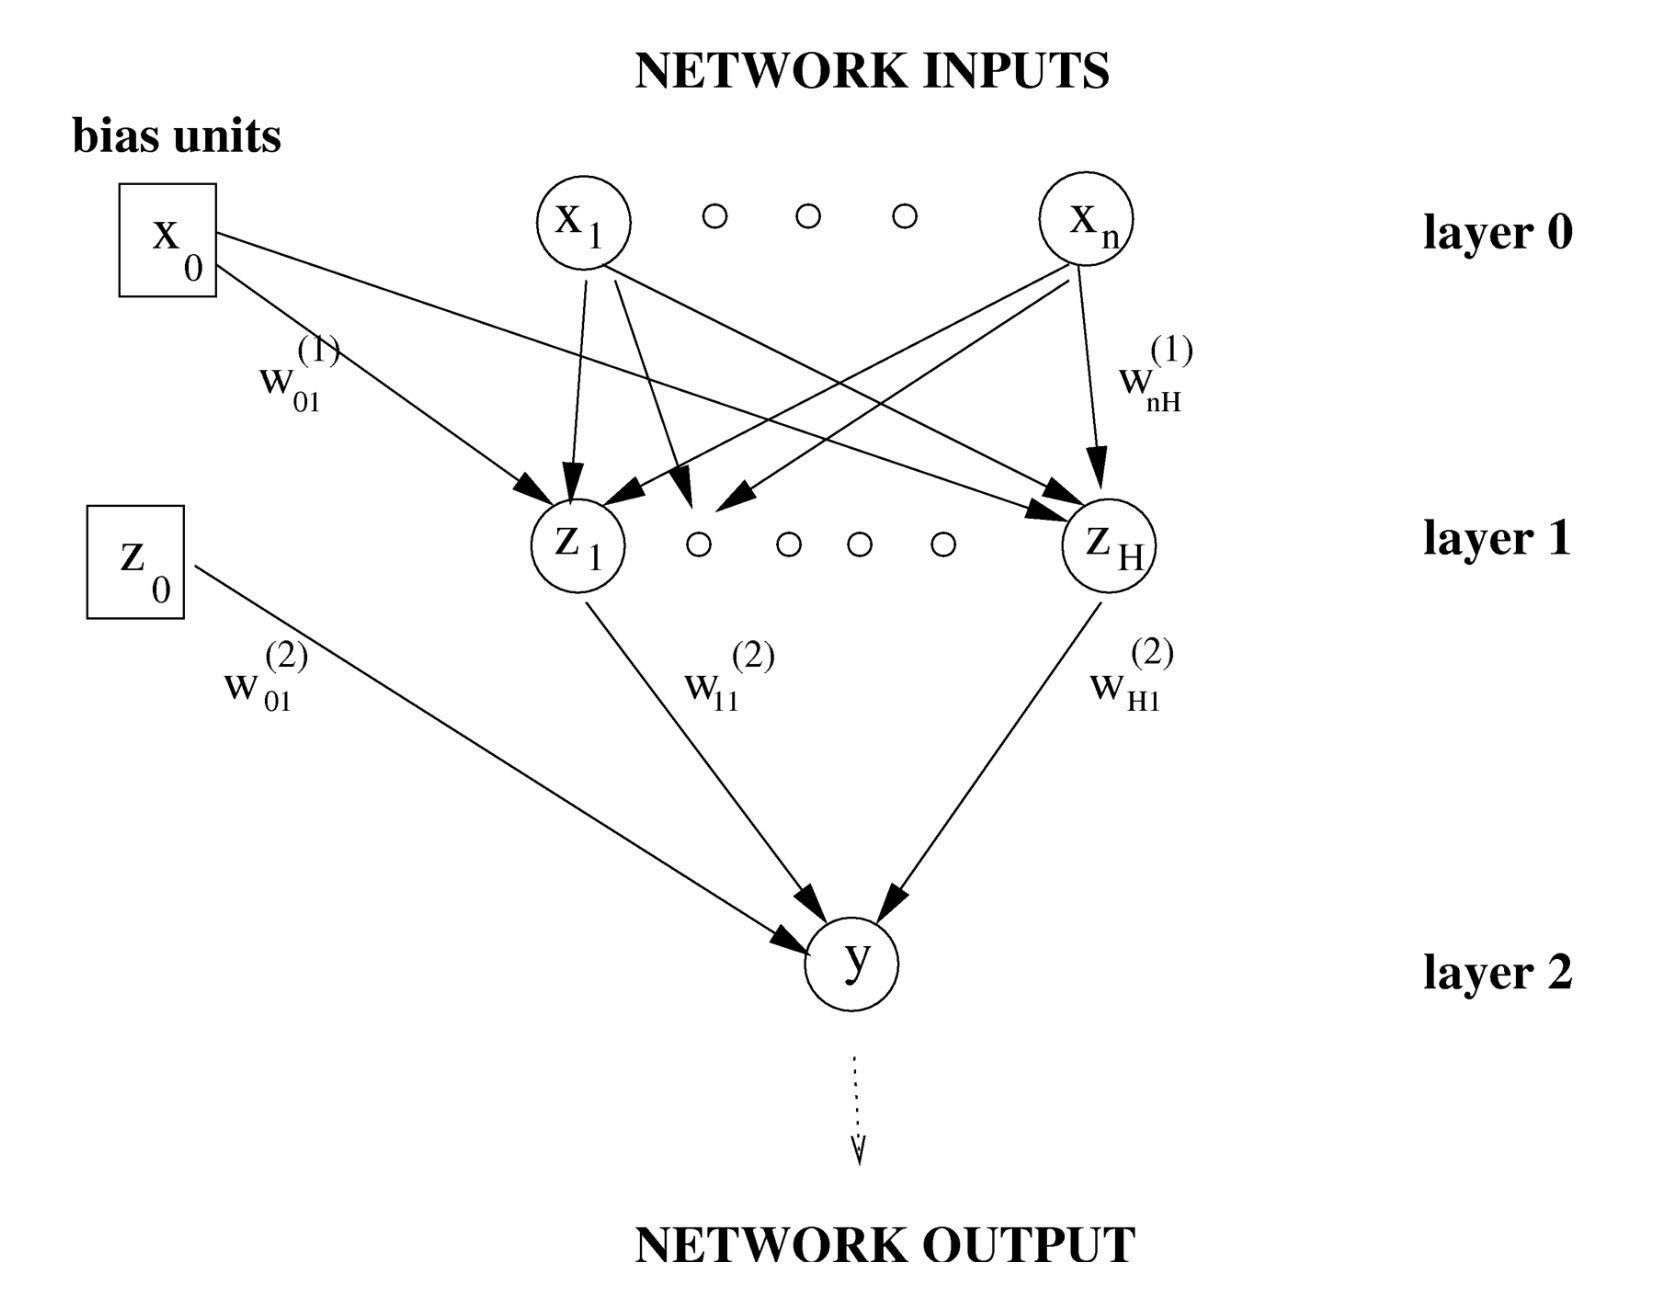

## Problem setup

Let's consider the following simplified network:
- **Input**: $x$, a single scalar input.
- **Hidden layer**: two neurons $z_1$ and $z_2$
- **Output**: $y_{\text{hat}}$

For a single input $x$, the hidden neurons are given by:
$$\begin{aligned}
\text{Neuron } z_1: & \quad a_1^{(1)} = w_{11}^{(1)} \cdot x, && \quad z_1 = g(a_1^{(1)}) = \frac{1}{1 + e^{-a_1^{(1)}}}, \\
\text{Neuron } z_2: & \quad a_2^{(1)} = w_{12}^{(1)} \cdot x, && \quad z_2 = g(a_2^{(1)}) = \frac{1}{1 + e^{-a_2^{(1)}}}.
\end{aligned}$$

Then the output neuron combines these two hidden neurons:
$$\begin{aligned}
a_1^{(2)} &= w_{11}^{(2)} z_1 + w_{21}^{(2)} z_2, \\
y_{\text{hat}} &= g(a_1^{(2)}) = \frac{1}{1 + e^{-a_1^{(2)}}}.
\end{aligned}$$

We consider a **loss** (squared error w.r.t. a true label $y$):
$$L = (y - y_{\text{hat}})^2.$$

Our goal is to **differentiate** $L$ with respect to the parameters:
$$\begin{aligned}
w_{11}^{(1)},\quad w_{12}^{(1)},\quad w_{11}^{(2)},\quad w_{21}^{(2)}.
\end{aligned}$$

We will compute these derivatives in two ways:
1. **Symbolic Differentiation** (analytical formulas)
2. **Automatic Differentiation** (via PyTorch `backward()`)

We will show that these two results match.


## PyTorch implementation

### Import dependencies
We will use the **PyTorch** library for its tensor capabilities and automatic differentiation functionality.

In [2]:
import torch
import torch.nn.functional as F
from torch.autograd import grad


### Define the activation function and its derivative 
We will use the logistic sigmoid $g(a) = 1 / (1 + e^{-a})$ as the activation function. Its derivative with respect to $a$ is:
$$\frac{d}{da} g(a) = g(a) \bigl(1 - g(a)\bigr).$$

However, for clarity, we can directly implement it as given in the example code:

In [3]:
def g(a):
    """
    Sigmoid function g(a) = 1 / (1 + e^-a)
    """
    return 1.0 / (1.0 + torch.exp(-a))

def gp(a):
    """
    Derivative of the sigmoid function g'(a)
    = exp(-a) / (1 + exp(-a))^2
    """
    return torch.exp(-a) / (1 + torch.exp(-a))**2

### Define the working variables
We will define:
- A target value $y$
- An input $x$
- Four weights we wish to learn/differentiate:
  - $w_{11}^{(1)}$ and $w_{12}^{(1)}$ for the hidden layer
  - $w_{11}^{(2)}$ and $w_{21}^{(2)}$ for the output layer

By setting `requires_grad=True`, PyTorch will keep track of operations involving these tensors, allowing automatic differentiation via the `backward()` call.

In [4]:
# Input
x = torch.tensor([-1.7])  # A single scalar input

# True target
y = torch.tensor([-4.5])  # A single scalar target

# Hidden layer weights
w11_1 = torch.tensor([0.13], requires_grad=True)  # w_{11}^{(1)}
w12_1 = torch.tensor([-2.0], requires_grad=True)  # w_{12}^{(1)}

# Output layer weights
w11_2 = torch.tensor([1.0], requires_grad=True)   # w_{11}^{(2)}
w21_2 = torch.tensor([0.5], requires_grad=True)   # w_{21}^{(2)}

### Forward pass
We compute:
$
a_1^{(1)} = w_{11}^{(1)} x,\quad
a_2^{(1)} = w_{12}^{(1)} x,\quad
z_1 = g(a_1^{(1)}),\quad z_2 = g(a_2^{(1)}),\quad
a_1^{(2)} = w_{11}^{(2)} z_1 + w_{21}^{(2)} z_2,\quad
y_{\text{hat}} = g(a_1^{(2)})$

and finally the loss $L = (y - y_{\text{hat}})^2$.

In [5]:
# Hidden neuron 1
a1_1 = w11_1 * x
z1   = g(a1_1)

# Hidden neuron 2
a2_1 = w12_1 * x
z2   = g(a2_1)

# Output neuron
a1_2 = w11_2 * z1 + w21_2 * z2
yhat = g(a1_2)

# Loss
L = (y - yhat)**2

### Symbolic gradients
From the slides and from our direct symbolic differentiation, we have:

$$\begin{aligned}
\frac{\partial L}{\partial w_{11}^{(1)}} 
&= -2 \,(y - y_{\text{hat}})\; g'(a_1^{(2)})\; w_{11}^{(2)}\; g'(a_1^{(1)})\; x,\\
\frac{\partial L}{\partial w_{12}^{(1)}} 
&= -2 \,(y - y_{\text{hat}})\; g'(a_1^{(2)})\; w_{21}^{(2)}\; g'(a_2^{(1)})\; x,\\
\frac{\partial L}{\partial w_{11}^{(2)}} 
&= -2 \,(y - y_{\text{hat}})\; g'(a_1^{(2)})\; z_1,\\
\frac{\partial L}{\partial w_{21}^{(2)}} 
&= -2 \,(y - y_{\text{hat}})\; g'(a_1^{(2)})\; z_2.
\end{aligned}$$

Let's compute these values explicitly in PyTorch (still using the same `gp` function for $g'(a)$).

In [6]:
# Symbolic gradients
Sgrad_L_w11_1 = -2 * (y - yhat) * gp(a1_2) * w11_2 * gp(a1_1) * x
Sgrad_L_w12_1 = -2 * (y - yhat) * gp(a1_2) * w21_2 * gp(a2_1) * x
Sgrad_L_w11_2 = -2 * (y - yhat) * gp(a1_2) * z1
Sgrad_L_w21_2 = -2 * (y - yhat) * gp(a1_2) * z2

Sgrad_L_w11_1, Sgrad_L_w12_1, Sgrad_L_w11_2, Sgrad_L_w21_2

(tensor([-0.8892], grad_fn=<MulBackward0>),
 tensor([-0.0563], grad_fn=<MulBackward0>),
 tensor([0.9424], grad_fn=<MulBackward0>),
 tensor([2.0494], grad_fn=<MulBackward0>))

### Automatic differentiation
We can then rely on PyTorch's **autograd** engine to compute the gradients for us. Simply call:

```python
L.backward()
```

and then retrieve the `.grad` attribute of each parameter of interest.

In [7]:
# Reset gradients (in case this cell is run multiple times)
w11_1.grad = None
w12_1.grad = None
w11_2.grad = None
w21_2.grad = None

# Perform backprop
L.backward()

# Automatic gradients
grad_L_w11_1 = w11_1.grad
grad_L_w12_1 = w12_1.grad
grad_L_w11_2 = w11_2.grad
grad_L_w21_2 = w21_2.grad

grad_L_w11_1, grad_L_w12_1, grad_L_w11_2, grad_L_w21_2

(tensor([-0.8892]), tensor([-0.0563]), tensor([0.9424]), tensor([2.0494]))

### Comparison of symbolic and automatic differentiation
Finally, let's print them side by side to verify they match (or are very close, up to floating-point rounding).

In [9]:
print("Loss L =", L.item())

print("\n--- dL/dw11^(2) ---")
print("Auto-grad:", grad_L_w11_2.item(), "\t Symbolic:", Sgrad_L_w11_2.item())

print("\n--- dL/dw21^(2) ---")
print("Auto-grad:", grad_L_w21_2.item(), "\t Symbolic:", Sgrad_L_w21_2.item())

print("\n--- dL/dw11^(1) ---")
print("Auto-grad:", grad_L_w11_1.item(), "\t Symbolic:", Sgrad_L_w11_1.item())

print("\n--- dL/dw12^(1) ---")
print("Auto-grad:", grad_L_w12_1.item(), "\t Symbolic:", Sgrad_L_w12_1.item())

Loss L = 27.21538734436035

--- dL/dw11^(2) ---
Auto-grad: 0.9423852562904358 	 Symbolic: 0.9423853754997253

--- dL/dw21^(2) ---
Auto-grad: 2.049448013305664 	 Symbolic: 2.049448251724243

--- dL/dw11^(1) ---
Auto-grad: -0.8891825079917908 	 Symbolic: -0.8891825079917908

--- dL/dw12^(1) ---
Auto-grad: -0.05625969544053078 	 Symbolic: -0.05625969544053078


---
In this exercise, we demonstrated that for our simple 2-hidden-neuron feedforward network:

1. **Symbolic differentiation** (i.e., deriving the gradient expressions by hand)
2. **Automatic differentiation** (i.e., via PyTorch's `backward()`)

yield the **same** results, up to numerical precision. This is a powerful illustration of why automatic differentiation is so valuable: it **automates** what would otherwise be a lengthy (and error-prone) symbolic derivation process.

Feel free to change the values of $x$, $y$, and the weights $w$ to see how the gradients match up in other situations.
You can now expand this example to more complex network architectures or different activation and loss functions.

## 2.2: Fully connected neural network in PyTorch

Now, let's replicate a feed-forward MLP using **PyTorch**.  

### 3.1 Data loading and setup
We will again use the **California Housing** dataset, but now train on the entire dataset (or a standard train/test split of your choice). We'll scale the data with `StandardScaler`.

In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch
import torch.nn as nn
import torch.optim as optim

cal_housing_full = fetch_california_housing()
X = cal_housing_full.data
y = cal_housing_full.target.reshape(-1, 1)

# Split
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale
scaler_X_full = StandardScaler()
X_train_scaled_full = scaler_X_full.fit_transform(X_train_full)
X_test_scaled_full = scaler_X_full.transform(X_test_full)

# Convert to torch tensors
X_train_torch = torch.tensor(X_train_scaled_full, dtype=torch.float32)
y_train_torch = torch.tensor(y_train_full, dtype=torch.float32)
X_test_torch = torch.tensor(X_test_scaled_full, dtype=torch.float32)
y_test_torch = torch.tensor(y_test_full, dtype=torch.float32)

print("Shapes:")
print("X_train_torch:", X_train_torch.shape)
print("y_train_torch:", y_train_torch.shape)

Shapes:
X_train_torch: torch.Size([16512, 8])
y_train_torch: torch.Size([16512, 1])


### 3.2 Building the neural network and training

We'll define the MLP in a simpler style using `nn.Sequential`. In **PyTorch**, when we write `model(X_train_torch)`, PyTorch calls the `__call__` method of `nn.Module`, which in turn calls the `forward` function we define (or in `nn.Sequential`'s case, the layers we add). This makes it easy to do the forward pass simply by calling `model(...)`.

We will test **three** different sizes for the hidden layer: 32, 64, and 128. We'll record the training loss each epoch and compare them. We will also try a variant with **two hidden layers**. Let's see how the training evolves.

In [17]:
import matplotlib.pyplot as plt

def train_mlp(hidden_dim=32, two_layers=False, num_epochs=50, lr=1e-3):
    """
    Train a PyTorch MLP on the California Housing dataset.
    Args:
      hidden_dim (int): number of neurons in the hidden layer.
      two_layers (bool): if True, use two hidden layers.
      num_epochs (int): number of training epochs.
      lr (float): learning rate.
    Returns:
      losses (list): training loss per epoch.
      final_mse (float): MSE on test set.
    """
    input_dim = X_train_torch.shape[1]
    output_dim = 1

    if not two_layers:
        # Single hidden layer
        model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )
    else:
        # Two hidden layers
        model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )

    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    losses = []
    for epoch in range(num_epochs):
        # Reset the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(X_train_torch)

        # Compute MSE loss
        loss = criterion(outputs, y_train_torch)

        # Backprop
        loss.backward()
        optimizer.step()

        # Store training loss for analysis
        losses.append(loss.item())

    # Evaluate on test
    model.eval()
    with torch.no_grad():
        test_pred = model(X_test_torch)
        test_mse = criterion(test_pred, y_test_torch).item()

    return losses, test_mse

Now let's train **three** single-hidden-layer MLPs with `hidden_dim = 32, 64, 128` and plot the loss curves. Then we'll also train **one** MLP with two hidden layers (e.g. both hidden layers have the same dimension). We'll compare the final MSE.

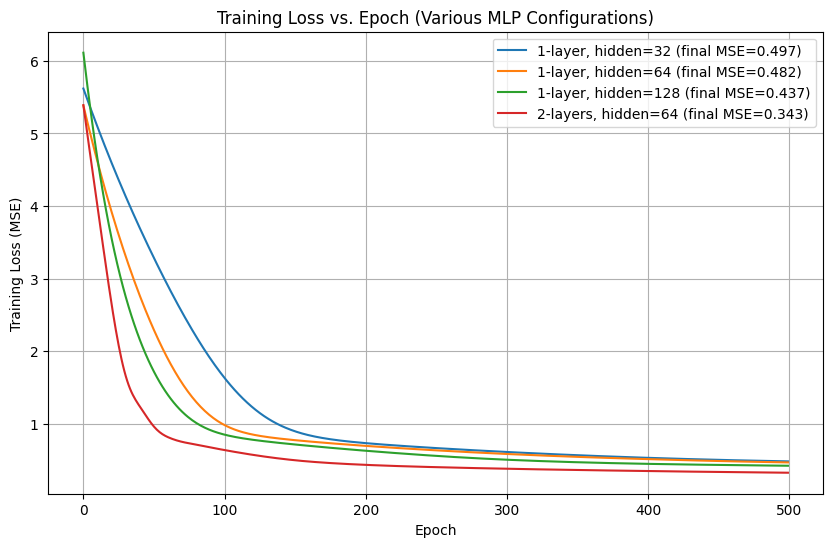

In [19]:
configs = [(32, False), (64, False), (128, False), (64, True)]
labels = ["1-layer, hidden=32", "1-layer, hidden=64", "1-layer, hidden=128", "2-layers, hidden=64"]

plt.figure(figsize=(10,6))

num_epochs = 500
for (hdim, two_lay), lab in zip(configs, labels):
    losses, mse_test = train_mlp(hidden_dim=hdim, two_layers=two_lay, num_epochs=num_epochs, lr=1e-3)
    plt.plot(range(num_epochs), losses, label=f"{lab} (final MSE={mse_test:.3f})")

plt.title("Training Loss vs. Epoch (Various MLP Configurations)")
plt.xlabel("Epoch")
plt.ylabel("Training Loss (MSE)")
plt.legend()
plt.grid(True)
plt.show()

Observations:
- We can see how the network with more hidden neurons might converge to a different final training loss.
- The two-layer network may take longer to converge at the begining but reach a lower local minimum (MSE wise).

# To explore further at home

---
## Bonus 1: A small neural network from scratch using vanilla Python

In this exercise, we:
- Load a small subset of the **California Housing** data.
- Implement a **1-hidden-layer** MLP with ReLU.
- Write out the **symbolic differentiation**.
- Evaluate the performance of the model.

### 2.1 Data Loading & Preprocessing

In [23]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1) Load data
cal_data = fetch_california_housing()
X_full = cal_data.data
y_full = cal_data.target

# Let's pick only the first 200 samples to keep things small
X_small = X_full
y_small = y_full

# 2) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_small, y_small, test_size=0.2, random_state=42
)

# 3) Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)

Training set shape: (16512, 8)
Test set shape: (4128, 8)


### 2.2 Manual MLP & Backpropagation

We will create a small **1-hidden-layer** neural network with:

- **Hidden size**: 10 neurons.
- **Activation**: ReLU $\mathrm{ReLU}(z) = \max(z,0)$.
- **Output**: 1 linear unit for regression.
- **Loss**: Mean Squared Error (MSE).

Recall the MSE for $N$ samples:
$$\text{MSE} = \frac{1}{N}\sum_{i=1}^N (y_i - \hat{y}_i)^2.$$

To manually implement **backpropagation**, we consider partial derivatives of MSE w.r.t. each parameter matrix. Let us define:

- $\hat{y}$ = model prediction, $y$ = true target.
- $dL\_dy\_hat = \frac{\partial L}{\partial \hat{y}}$.  
  For MSE, $dL\_dy\_hat = \frac{2}{N}(\hat{y} - y)$.
- For the output layer ($Z^2 = W^2 Z^1 + b^2$), we write
  $$dZ^2_{in} = dL_{dy_{hat}},$$  
  because $Z^2_{in}$ is the pre-activation. Then the gradients w.r.t. $W^2$ and $b^2$ become:
  $$ dW^2 = dZ^2_{in} \cdot (Z^1)^{\top}, \quad db^2 = \sum_{\text{over batch}} dZ^2_{in}. $$
- For the hidden layer, we do:
  $$dZ^1_{out} = (W^2)^{\top} dZ^2_{in}, \quad dZ^1_{in} = dZ^1_{out} \odot (\text{ReLU}'(Z^1_{in})).$$  
  The symbol $\odot$ denotes elementwise multiplication (Hadamard product).  
  Then,
  $$ dW^1 = dZ^1_{in}\cdot X^{\top}, \quad db^1 = \sum_{\text{over batch}} dZ^1_{in}. $$

Below is the code, with additional comments clarifying each step.

In [24]:
class SimpleMLP:
    def __init__(self, input_dim=8, hidden_size=10, output_dim=1, lr=1e-3):
        """
        Simple 1-hidden-layer MLP with ReLU.

        Args:
            input_dim (int): dimension of input features
            hidden_size (int): number of neurons in hidden layer
            output_dim (int): dimension of output layer (1 for regression)
            lr (float): learning rate for gradient descent
        """
        self.lr = lr
        
        # Initialize weights & biases
        # W1 shape: (hidden_size, input_dim)
        # b1 shape: (hidden_size, 1)
        self.W1 = np.random.randn(hidden_size, input_dim) * 0.01
        self.b1 = np.zeros((hidden_size, 1))
        
        # W2 shape: (output_dim, hidden_size)
        # b2 shape: (output_dim, 1)
        self.W2 = np.random.randn(output_dim, hidden_size) * 0.01
        self.b2 = np.zeros((output_dim, 1))

    def relu(self, Z):
        """
        ReLU activation function: ReLU(z) = max(z, 0)
        Z can be a matrix, so we apply elementwise.
        """
        return np.maximum(0, Z)

    def relu_deriv(self, Z):
        """
        Derivative of ReLU: 1 if Z>0, else 0.
        """
        return (Z > 0).astype(Z.dtype)

    def forward(self, X):
        """
        Forward pass through the network.

        X shape: (input_dim, N)
        Returns y_hat of shape (1, N) for regression.

        Steps:
          1) Z1_in = W1 @ X + b1
          2) Z1_out = ReLU(Z1_in)
          3) Z2_in = W2 @ Z1_out + b2  (final output, linear)
        """
        # Hidden layer linear step
        self.Z1_in = self.W1 @ X + self.b1  # shape: (hidden_size, N)

        # Hidden layer activation
        self.Z1_out = self.relu(self.Z1_in)  # shape: (hidden_size, N)

        # Output layer linear step
        self.Z2_in = self.W2 @ self.Z1_out + self.b2  # shape: (1, N)

        return self.Z2_in  # linear output

    def backward(self, X, y, y_hat):
        """
        Backpropagation for MSE loss.

        X: (input_dim, N)
        y: (1, N)
        y_hat: (1, N) predicted by forward pass

        We compute the derivative of MSE w.r.t. the weights:
          dL_dy_hat = (2/N)*(y_hat - y)
        Then propagate back.
        """
        N = X.shape[1]  # number of samples

        # 1) dL/dy_hat: derivative of the MSE cost wrt. the output prediction
        dL_dy_hat = (2.0 / N) * (y_hat - y)  # shape: (1, N)

        # 2) Output layer gradient
        #    y_hat = Z2_in, so dZ2_in = dL_dy_hat
        dZ2_in = dL_dy_hat

        # Grad wrt W2, b2
        # W2 shape (1, hidden_size), Z1_out shape (hidden_size, N)
        # => dW2 shape also (1, hidden_size)
        dW2 = dZ2_in @ self.Z1_out.T   # matrix multiply
        db2 = np.sum(dZ2_in, axis=1, keepdims=True)

        # 3) Hidden layer gradient
        #    dZ1_out = W2^T * dZ2_in
        dZ1_out = self.W2.T @ dZ2_in  # shape (hidden_size, N)

        #    dZ1_in = dZ1_out * ReLU'(Z1_in)
        dZ1_in = dZ1_out * self.relu_deriv(self.Z1_in)

        #    Grad wrt W1, b1
        dW1 = dZ1_in @ X.T  # shape (hidden_size, input_dim)
        db1 = np.sum(dZ1_in, axis=1, keepdims=True)

        # 4) Gradient descent step
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1

    def predict(self, X):
        """
        Predict function (just forward pass).
        """
        return self.forward(X)


### 2.3 Training & Testing

We now perform a simple batch gradient descent for a certain number of epochs. Then we evaluate the MSE on the test set.

In [28]:
# Create an MLP instance
mlp = SimpleMLP(input_dim=8, hidden_size=10, output_dim=1, lr=1e-2)

# Convert data so that features are columns, i.e. shape: (input_dim, N)
X_train_t = X_train_scaled.T  # shape (8, N)
y_train_t = y_train.reshape(1, -1)  # shape (1, N)

# Training loop
num_epochs = 500
for epoch in range(num_epochs):
    y_hat = mlp.forward(X_train_t)
    mlp.backward(X_train_t, y_train_t, y_hat)

# Evaluate
X_test_t = X_test_scaled.T
y_test_t = y_test.reshape(1, -1)
y_pred_test = mlp.predict(X_test_t)
mse_test = np.mean((y_pred_test - y_test_t)**2)
print(f"Final Test MSE after {num_epochs} epochs: {mse_test:.4f}")

Final Test MSE after 500 epochs: 0.6355


## Bonus 2: Facial keypoints detection with PyTorch CNN

## Introduction
Facial keypoint detection is the task of identifying important landmarks on a human face (e.g., corners of the eyes, nose tip, mouth corners) in an image. These keypoints are crucial for many applications in computer vision:

- Aligning faces for recognition or verification.
- Tracking facial expressions for emotion detection.
- Applying augmented reality filters or effects accurately on a face.

In this exercise, we will build a system to detect **15 keypoints** on **96x96 grayscale face images**. We'll use convolutional neural networks (CNNs) for this task, as CNNs are highly effective in image analysis. CNNs can automatically learn spatial hierarchies of features from images – from low-level edges to high-level shapes – which makes them well-suited for detecting patterns like facial features. The network will take an image as input and output the $ (x,y) $ coordinates of the **15 facial keypoints**.

Source: [danielnouri.org](https://danielnouri.org/notes/2014/12/17/using-convolutional-neural-nets-to-detect-facial-keypoints-tutorial/)

## Dataset overview

We will use the **Kaggle Facial Keypoints Detection** dataset. This dataset consists of a training set of **7,049** face images (96x96 pixels, grayscale). Each image has up to **15 keypoint coordinates** labeled (30 values: $ x $ and $ y $ for each of 15 facial landmarks). For example, the keypoints include the centers of the eyes, the tip of the nose, and the corners of the mouth.

### Data format
The training data is provided as a CSV file (`training.csv`). Each row contains:

- **30 columns** of keypoint coordinates: `left_eye_center_x`, `left_eye_center_y`, `right_eye_center_x`, ... etc. (15 keypoints $\times$ 2). If a keypoint was not labeled for a given image, its value is missing.
- An **Image** column containing 96x96 pixel intensity values (9216 numbers) in a single string, separated by spaces.

### Missing values
Not all images have all 15 keypoints annotated. In fact, only about 30% of the images have all 15 keypoints; the rest have some missing keypoint labels. Nearly all images have at least a few keypoints (e.g., eyes, nose, mouth) labeled, but many did not have the more peripheral points. In this tutorial, for simplicity, we will use only images with **complete keypoint data** (all 15 points). This means we'll discard images with any missing keypoint values. (In practice, one could use data augmentation or multi-stage training to leverage partially labeled images, but we will not cover that here.)

Below, we assume you have a Kaggle account and have set up the Kaggle API (with `kaggle.json` credentials). The following code will download the dataset from Kaggle and load the training data into a pandas DataFrame. 

In [ ]:
# Install Kaggle API tool (if not already installed) and download the dataset
!pip install -q kaggle

# Use Kaggle API to download the Facial Keypoints Detection dataset
!kaggle competitions download -c facial-keypoints-detection -p data/

# Unzip the downloaded files (training.csv, test.csv, etc. will be extracted)
!unzip -q data/facial-keypoints-detection.zip -d data

After running the above, you should have a `training.csv` file (and a `test.csv` for the test set) in the `data/` directory. Now, let's load the training data using pandas and examine its structure.

In [2]:
import pandas as pd

# Load the training data
df = pd.read_csv('data/training.csv')
print("Training data shape:", df.shape)
df.head(5)  # show first 2 rows as an example

Training data shape: (7049, 31)


,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


This will show the DataFrame with columns for each keypoint and the "Image" column containing pixel values. Let's check how many values are present in each column and how many are missing:

In [3]:
# Count non-null values in each column
print(df.count())

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

From this, we can see which keypoint columns have missing values. We expect some columns to have 7049 values (no missing data for those keypoints) and others to have fewer (indicating missing labels). If a column has fewer than 7049 non-null entries, the difference is the number of missing values.

## Data exploration

Before training a model, it's important to understand the dataset. We will:

1. Identify how many keypoint annotations are missing.
2. Visualize a few images with their annotated keypoints to get an intuition of the task.

### Missing Values
We already counted non-null values. Let's quantify missing data more directly:

In [4]:
# Check total missing values per column
missing_counts = df.isnull().sum()
print("Missing values per column:")
print(missing_counts)

Missing values per column:
left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_l

You should see that some keypoint columns (e.g., `left_eye_center_x`) have very few missing values, while others (e.g., some mouth or eyebrow points) have thousands of missing entries. In fact, only 2,140 images have **all** 15 keypoints labeled, meaning the remainder have some missing points. We will handle this in preprocessing by removing incomplete rows.

### Sample visualization
Let's visualize some of the images with their keypoints to understand the data. We will pick a few examples (ensuring they have no missing keypoints) and plot them in a grid.

Number of complete cases (no missing keypoints): 2140


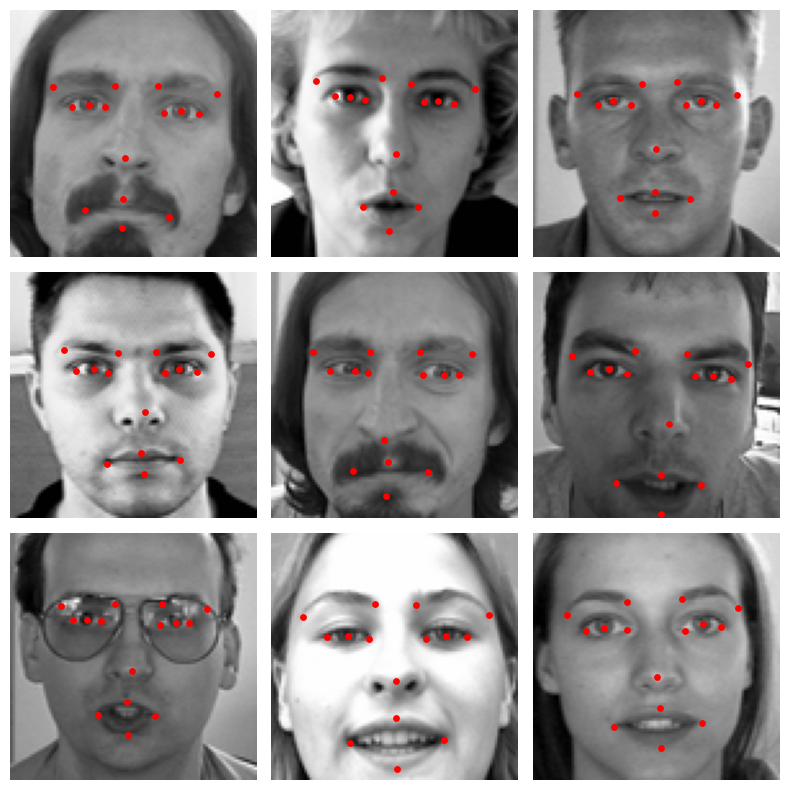

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Drop rows with any missing values to get complete cases for visualization
df_complete = df.dropna().reset_index(drop=True)
print("Number of complete cases (no missing keypoints):", len(df_complete))

# Convert the first 9 images to arrays for display
sample_images = df_complete['Image'].iloc[:9].values
sample_images = [np.fromstring(img_str, sep=' ').reshape(96, 96) for img_str in sample_images]
sample_keypoints = df_complete.iloc[:9, :-1].values  # first 30 columns are keypoints

# Plot 9 images in a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
axes = axes.flatten()
for i in range(9):
    axes[i].imshow(sample_images[i], cmap='gray')
    # Plot keypoints as red dots
    kp = sample_keypoints[i]
    axes[i].scatter(kp[0::2], kp[1::2], c='red', s=15)
    axes[i].axis('off')
plt.tight_layout()
plt.show()

Expected: The output would show 9 face images with red dots marking the locations of eyes, nose, mouth, etc. This visual check helps verify that the keypoints line up with facial features (for instance, dots around the eyes, nose, and mouth).

## Data preprocessing

Next, we need to prepare the data for training a PyTorch model. This involves:

1. **Handling missing keypoint values**: We'll simplify by using only the images that have all 15 keypoints labeled.
2. **Converting the image data** from strings to numeric arrays.
3. **Normalizing** the pixel values (scaling them to $[0,1]$) by dividing by 255.
4. **Reshaping** the images to the proper format ($ (N, 1, 96, 96) $ for a single-channel image).
5. **Preparing the keypoint coordinates** array of shape ($ N, 30 $). Each sample has 30 target values: 15 $ x $-coordinates and 15 $ y $-coordinates.

In practice, one could use more sophisticated data augmentation strategies or partial labeling approaches, but we'll keep things simple here.

In [6]:
# 1. Drop rows with missing values
df = df.dropna().reset_index(drop=True)
print("Remaining training samples after dropping missing:", len(df))

# 2. Convert the 'Image' column from strings to numpy arrays of shape (96,96)
df['Image'] = df['Image'].apply(lambda img: np.fromstring(img, sep=' ', dtype=np.float32))

# 3. Normalize pixel values to [0,1]
df['Image'] = df['Image'].apply(lambda img: img/255.0)

# 4. Convert list of image arrays to a 4D numpy array for model input
X = np.vstack(df['Image'].values)  # shape (N, 9216)
X = X.reshape(-1, 1, 96, 96).astype(np.float32)  # (N, 1, 96, 96)

# 5. Prepare keypoint targets as a numpy array
y = df[df.columns[:-1]].values  # all columns except the 'Image' column
y = y.astype(np.float32)
print("X shape:", X.shape, "y shape:", y.shape)

Remaining training samples after dropping missing: 2140
X shape: (2140, 1, 96, 96) y shape: (2140, 30)


In [7]:
from sklearn.model_selection import train_test_split

# We'll do a 90/10 train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
print("Training samples:", len(X_train), "Validation samples:", len(X_val))

Training samples: 1926 Validation samples: 214


## Model definition

We will create a Convolutional Neural Network (CNN) to **regress** the 30 keypoint coordinates from the input image. The architecture of our CNN will be as follows:

1. **Conv Layer 1**: 1 input channel (grayscale) -> 32 filters, kernel size 3x3, activation ReLU, followed by Max Pooling (2x2).
2. **Conv Layer 2**: 32 -> 64 filters, 3x3, ReLU, followed by Max Pooling (2x2).
3. **Conv Layer 3**: 64 -> 128 filters, 3x3, ReLU, followed by Max Pooling (2x2).
4. **Flatten**: Flatten the feature maps into a vector.
5. **Fully Connected 1**: 256 neurons, ReLU, with Dropout (to reduce overfitting).
6. **Fully Connected 2**: 128 neurons, ReLU, with Dropout.
7. **Output Layer**: 30 outputs (the $ x,y $ coordinates for 15 keypoints), linear activation (no final nonlinearity, since this is a regression output).

Dropout layers will help regularize the network by randomly dropping a fraction of neurons during training, which can improve generalization. We expect the CNN to learn to detect facial features through the convolutional layers (which capture local patterns like edges, corners of eyes/mouth, etc.), and the fully connected layers will combine these to predict the precise coordinates.

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class KeypointCNN(nn.Module):
    def __init__(self):
        super(KeypointCNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)   # 96x96 -> 94x94 (then 47x47 after pool)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)  # 47x47 -> 45x45 (then 22x22 after pool)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3) # 22x22 -> 20x20 (then 10x10 after pool)
        self.pool = nn.MaxPool2d(2, 2)

        # Dropout layers
        self.dropout1 = nn.Dropout(0.1)
        self.dropout2 = nn.Dropout(0.2)

        # Fully connected layers
        self.fc1 = nn.Linear(128 * 10 * 10, 256)  # 128 feature maps * 10 * 10
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 30)  # 30 outputs (x,y for 15 keypoints)
        
    def forward(self, x):
        # Three conv layers with ReLU and pooling
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        # Flatten
        x = x.view(x.size(0), -1)

        # Fully connected layers with dropout and ReLU
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Instantiate the model
model = KeypointCNN()
print(model)

KeypointCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.1, inplace=False)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=12800, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=30, bias=True)
)


## Training the model

Now, let's train the model on our training data and monitor its performance on the validation set.

- **Data Loaders**: We'll use PyTorch `DataLoader` to batch and shuffle the data for training and to batch the validation data.
- **Loss Function**: This is a regression problem (predicting continuous coordinate values), so a common choice is **Mean Squared Error** (`nn.MSELoss`) in PyTorch.
- **Optimizer**: We'll use **Adam** for efficient stochastic gradient descent.
- **Training Loop**: We'll train for a number of epochs (iterations over the whole training set). In each epoch:
  1. Set the model to training mode.
  2. Loop over mini-batches from the training loader.
  3. For each batch, do a forward pass to get predictions, compute the loss, do a backward pass to compute gradients, and update weights.
  4. Evaluate the model on the validation set after each epoch to track performance.


In [9]:
from torch.utils.data import DataLoader, TensorDataset

# Create TensorDatasets for train and validation
train_dataset = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
val_dataset = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))

# DataLoader for batching
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

import torch.optim as optim

criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 20
for epoch in range(1, epochs+1):
    model.train()
    train_loss = 0.0
    for batch_images, batch_keypoints in train_loader:
        images = batch_images
        keypoints = batch_keypoints

        outputs = model(images)
        loss = criterion(outputs, keypoints)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)
    train_loss /= len(train_loader.dataset)

    # Validation phase
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_images, batch_keypoints in val_loader:
            images = batch_images
            keypoints = batch_keypoints
            preds = model(images)
            loss = criterion(preds, keypoints)
            val_loss += loss.item() * images.size(0)
    val_loss /= len(val_loader.dataset)

    print(f"Epoch {epoch}/{epochs} - Training Loss: {train_loss:.4f} - Validation Loss: {val_loss:.4f}")

Epoch 1/20 - Training Loss: 908.0082 - Validation Loss: 47.9701
Epoch 2/20 - Training Loss: 108.6661 - Validation Loss: 16.0496
Epoch 3/20 - Training Loss: 73.4157 - Validation Loss: 19.7387
Epoch 4/20 - Training Loss: 67.9279 - Validation Loss: 11.2568
Epoch 5/20 - Training Loss: 56.2774 - Validation Loss: 26.1997
Epoch 6/20 - Training Loss: 51.8459 - Validation Loss: 11.6780
Epoch 7/20 - Training Loss: 47.6438 - Validation Loss: 11.0175
Epoch 8/20 - Training Loss: 45.3819 - Validation Loss: 12.3113
Epoch 9/20 - Training Loss: 42.8149 - Validation Loss: 21.6971
Epoch 10/20 - Training Loss: 44.1204 - Validation Loss: 11.0495
Epoch 11/20 - Training Loss: 39.6160 - Validation Loss: 11.7158
Epoch 12/20 - Training Loss: 36.9654 - Validation Loss: 15.9597
Epoch 13/20 - Training Loss: 38.9064 - Validation Loss: 11.1208
Epoch 14/20 - Training Loss: 34.0392 - Validation Loss: 10.0455
Epoch 15/20 - Training Loss: 35.2427 - Validation Loss: 10.5153
Epoch 16/20 - Training Loss: 38.4159 - Validati

## Evaluation and results

After training, we'll evaluate the model's performance. One common metric for this task is **Root Mean Squared Error (RMSE)** of the keypoint predictions. RMSE is the square root of MSE, giving an error in the same units as the coordinates (pixels). We will calculate RMSE on the validation set.

For instance, an RMSE of 4.0 would mean on average the predictions are about 4 pixels away from the true keypoint positions.

In [10]:
# Switch to evaluation mode
model.eval()

# Predict on the entire validation set
with torch.no_grad():
    val_preds = model(torch.from_numpy(X_val)).numpy()

# Compute RMSE on validation set
val_truth = y_val  # actual keypoints
mse_val = np.mean((val_preds - val_truth)**2)
rmse_val = np.sqrt(mse_val)
print(f"Validation RMSE: {rmse_val:.3f} pixels")

Validation RMSE: 3.656 pixels


### Visualizing predictions
Finally, let's visualize some predictions to see how the model is performing. We'll take a few images from the validation set (which the model hasn't seen during training) and plot the image with:

- The **ground truth** keypoints (in green)
- The **predicted** keypoints (in red)

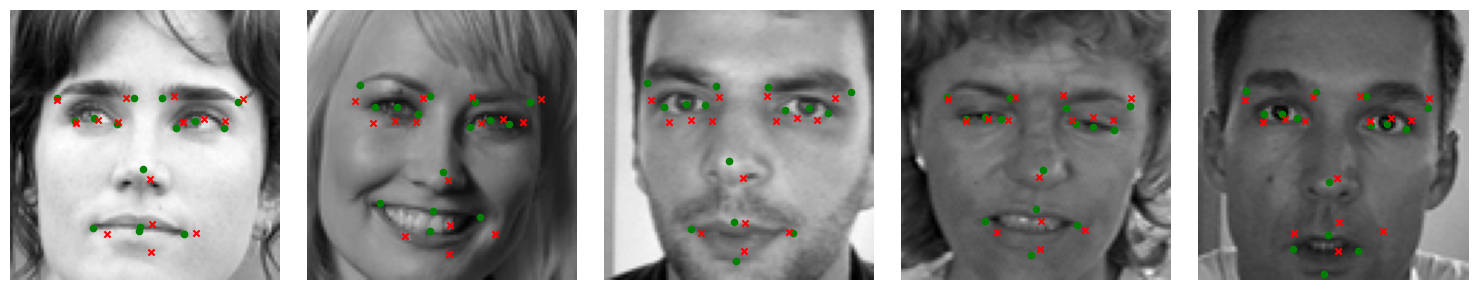

In [11]:
# Choose a few samples from validation to visualize
num_samples_to_show = 5
indices = np.random.choice(len(X_val), size=num_samples_to_show, replace=False)

fig, axes = plt.subplots(1, num_samples_to_show, figsize=(15, 3))
for i, idx in enumerate(indices):
    img = X_val[idx].reshape(96, 96)  # reshape to 96x96 for display
    true_kp = y_val[idx]
    pred_kp = val_preds[idx]

    axes[i].imshow(img, cmap='gray')
    # Plot true keypoints in green
    axes[i].scatter(true_kp[0::2], true_kp[1::2], c='green', s=20, label='True')
    # Plot predicted keypoints in red
    axes[i].scatter(pred_kp[0::2], pred_kp[1::2], c='red', s=20, marker='x', label='Pred')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In the displayed images, **green** dots should mark the actual keypoint positions and **red** x's mark the model's predicted positions. Ideally, they will be close for most points. You might notice the model does well on prominent features like the eye centers or nose tip, but could be less accurate on some others, especially if the network hasn't fully converged or if data is limited. A deeper network or additional data augmentation could further improve performance.